In [1]:
import numpy as np
import matplotlib.pyplot as plt
from methods import *

##### In this notebook we will replicate Figure 1. and Figure 2. from *Guéant O., Lehalle CA., Fernandez Tapia J. (2012)*

### Figure 1.

Set model parameters

In [2]:
# Time horizon and discretization
T = 300 # liquidation time (in seconds)
N = 500 # number of time steps
dt = T / N
time_grid = np.linspace(T, 0, N+1) # backward grid: from T to 0

# Model parameters (example values, adjust as needed)
q_max = 6 # maximum inventory (number of shares to liquidate)
b = 3 # liquidation cost per share (penalty at time T)
A = 0.1 # intensity scale parameter (s^-1)
k = 0.3 # intensity shape parameter (Tick^-1)
gamma = 0.05 # risk aversion parameter (Tick^-1)
mu = 0 # drift of the reference price (Tick/s)
sigma = 0.3 # volatility (Tick/s^(1/2))

# Derived parameters
alpha = 0.5 * k * gamma * sigma**2
beta = k * mu
eta = A * (1 + gamma/k) ** (-(1 + k/gamma))


In [3]:
optimal_quotes = compute_optimal_quote(q_max,N,k,b,alpha,beta,gamma,eta,dt)

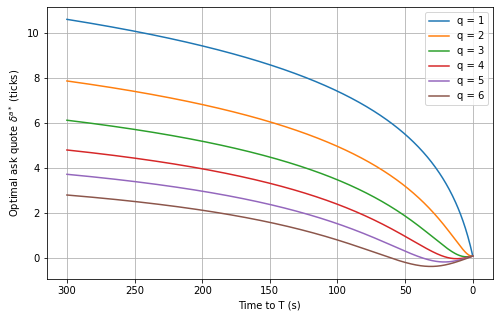

In [4]:
plt.figure(figsize=(8, 5))
for i in range(optimal_quotes.shape[0]-1):
    plt.plot(time_grid, optimal_quotes[i+1], label=f"q = {i+1}")
plt.xlabel("Time to T (s)")
plt.ylabel(r"Optimal ask quote $\delta^{a*}$ (ticks)")
# plt.title("Figure 1. Evolution of the optimal ask quote over time over 5 minutes")
plt.legend()
plt.gca().invert_xaxis()  # so that time 0 appears on the left and T on the right
plt.grid(True)
plt.savefig("Figures/Figure_1.png")


##### In this notebook we will replicate Figure 1. and Figure 2. from *Guéant O., Lehalle CA., Fernandez Tapia J. (2012)*

### Figure 2.

Set model parameters

In [5]:
# Time horizon and discretization
T = 60 * 60 * 2 # liquidation time (in seconds)
N = 500 # number of time steps
dt = T / N
time_grid = np.linspace(T, 0, N+1) # backward grid: from T to 0

# Model parameters (example values, adjust as needed)
q_max = 6 # maximum inventory (number of shares to liquidate)
b = 3 # liquidation cost per share
A = 0.1 # intensity scale parameter
k = 0.3 # intensity shape parameter
gamma = 0.05 # risk aversion parameter
mu = 0 # drift of the reference price
sigma = 0.3 # volatility

# Derived parameters
alpha = 0.5 * k * gamma * sigma**2
beta = k * mu
eta = A * (1 + gamma/k) ** (-(1 + k/gamma))


In [6]:
optimal_quotes = compute_optimal_quote(q_max,N,k,b,alpha,beta,gamma,eta,dt)

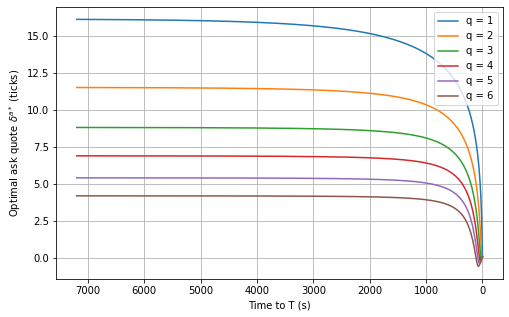

In [7]:
plt.figure(figsize=(8, 5))
for i in range(optimal_quotes.shape[0]-1):
    plt.plot(time_grid, optimal_quotes[i+1], label=f"q = {i+1}")
plt.xlabel("Time to T (s)")
plt.ylabel(r"Optimal ask quote $\delta^{a*}$ (ticks)")
# plt.title("Figure 2. Evolution of the optimal ask quote over time over 2 hours")
plt.legend()
plt.gca().invert_xaxis()  # so that time 0 appears on the left and T on the right
plt.grid(True)
plt.savefig("Figures/Figure_2.png")
